Introduction

Classification is the process of predicting the class of a data based on given points. Identifying categories, labels or segmented groups in your data is the main objective of classifying. A classification model attemps to draw some conclusion from observed values and make prediction in order to classify the new data. 

The following example demonstrate how classification can be done on the mushroom dataset to distinguish the edible and poisonous mushroom. By applying classification techniques, the most important predictors that characterise poisonous/edible mushroom can also be found. 

The mushroom dataset includes descriptions of 23 spiecies of gilled mushroom based a sample size of 8123 observations. The most important variable in this dataset would be its edibility. The guide included in the dataset states that there is no simple rule for determining the edibility of a mushroom. 


Exploring, manipluating and cleaning the data 

The dataset is read directly from its source using R. 

In [ ]:
library(dplyr)
library(data.table)

data = fread('http://www.grappa.univ-lille3.fr/~torre/Recherche/Datasets/downloads/agaricus-lepiota/agaricus-lepiota.data', data.table = F)

colnames(data) <- c("cap_shape", "cap_surface", 
                        "cap_color", "bruises", "odor", 
                        "gill_attachement", "gill_spacing", "gill_size", 
                        "gill_color", "stalk_shape", "stalk_root", 
                        "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_color_above_ring", 
                        "stalk_color_below_ring", "veil_type", "veil_color", 
                        "ring_number", "ring_type", "spore_print_color", 
                        "population", "habitat","edibility")

As the dataset did not contain names of the columns, an extra step of renaming the columns were required. Also, as the attributes of many columns were wrongly identified, the author converted them into factors and renamed each factor level corresponding to the dataset description. This is to ensure we have a good understanding of data by knowing their meanings. It also helped with understanding the plots later.

In [ ]:
data[,c(1:23)] = lapply(data[,c(1:23)],factor)
levels(data$edibility) <- c("edible", "poisonous")
levels(data$cap_shape) <- c("bell", "conical", "flat", "knobbed", "sunken", "convex")
levels(data$cap_color) <- c("buff", "cinnamon", "red", "gray", "brown", "pink", 
                                "green", "purple", "white", "yellow")
levels(data$cap_surface) <- c("fibrous", "grooves", "scaly", "smooth")
levels(data$bruises) <- c("no", "yes")
levels(data$odor) <- c("almond", "creosote", "foul", "anise", "musty", "none", "pungent", "spicy", "fishy")
levels(data$gill_attachement) <- c("attached", "free")
levels(data$gill_spacing) <- c("close", "crowded")
levels(data$gill_size) <- c("broad", "narrow")
levels(data$gill_color) <- c("buff", "red", "gray", "chocolate", "black", "brown", "orange", 
                                 "pink", "green", "purple", "white", "yellow")
levels(data$stalk_shape) <- c("enlarging", "tapering")
levels(data$stalk_root) <- c("missing", "bulbous", "club", "equal", "rooted")
levels(data$stalk_surface_above_ring) <- c("fibrous", "silky", "smooth", "scaly")
levels(data$stalk_surface_below_ring) <- c("fibrous", "silky", "smooth", "scaly")
levels(data$stalk_color_above_ring) <- c("buff", "cinnamon", "red", "gray", "brown", "pink", 
                                             "green", "purple", "white", "yellow")
levels(data$stalk_color_below_ring) <- c("buff", "cinnamon", "red", "gray", "brown", "pink", 
                                             "green", "purple", "white", "yellow")
levels(data$veil_type) <- "partial"
levels(data$veil_color) <- c("brown", "orange", "white", "yellow")
levels(data$ring_number) <- c("none", "one", "two")
levels(data$ring_type) <- c("evanescent", "flaring", "large", "none", "pendant")
levels(data$spore_print_color) <- c("buff", "chocolate", "black", "brown", "orange", 
                                        "green", "purple", "white", "yellow")
levels(data$population) <- c("abundant", "clustered", "numerous", "scattered", "several", "solitary")
levels(data$habitat) <- c("wood", "grasses", "leaves", "meadows", "paths", "urban", "waste")

Now that's all renaming had been done, let's have a quick overview look of our data. 

In [ ]:
head(data,20)

It is noticed that while all other variables except for veil_type has two or more levels, column veil_type has only one. So basically, this variable does not bring any information while potentially creating problems for the modelling stage, as such, let's take delete that column. 

In [ ]:
data$veil_type = NULL

After the data was renamed and tidied up, let's check for the missing values. Depending on the types of missing values, there would be different methods to impute them. 

In [ ]:
sapply(data, function(x) sum(is.na(x)))

It appeared that there were no missing values. This heavily suggested that the data was extracted from a lab upon which conditions to fully observe all of the samples population can be achieved. 

Identifying the important variables and plotting them 

As can be seen in the dataset, there were 22 predictors for the edibility variable. Due to their amount, it is almost impossible to plot them all to gain insightful knowledge about how they affect the mushroom edibility. As such, the first step would be to identify the variables importance using randomForest package. 

In [ ]:
library(randomForest)
set.seed(124)
model_iv = randomForest(edibility ~.,data = data, ntree = 30)

The above model was built to identify the important variables. It applied random forest with edibility as the dependant while the remaing columns were used as predictors. It runs with a number of trees equal to 30 to improve accuracy and then the plot to display each variable importance can be extracted using the following.

In [ ]:
varImpPlot(model_iv, sort = T, n.var = 10)

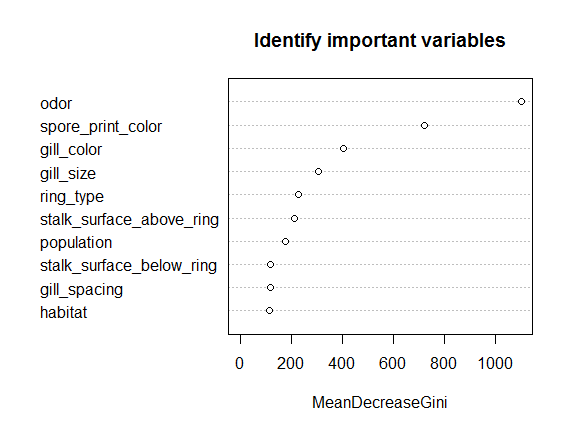

It can be noticed that odor and spore_print_color were the two most important variables in identifying a mushroom edibility as they consisted a much higher values than the rest. spore_print_color is two times more important than gill_color while odor was almost twice that of spore_print_color.

Now that the most important variables were identfied. It's time to plot them to see how they affect the mushroom ediblity. Just for a good comparisons, plots using gill_size and ring_type are also include in the following to demonstrate how the data points are distributed between important and less important variables. 

In [ ]:
library(ggplot2)

ggplot(data, aes(x = edibility, y = odor, col = edibility)) + 
  geom_jitter(alpha = 0.5) + 
  scale_color_manual(breaks = c("edible", "poisonous"), 
                     values = c("blue", "yellow"))

ggplot(data, aes(x = edibility, y = spore_print_color, col = edibility)) + 
  geom_jitter(alpha = 0.5) + 
  scale_color_manual(breaks = c("edible", "poisonous"), 
                     values = c("blue", "yellow"))


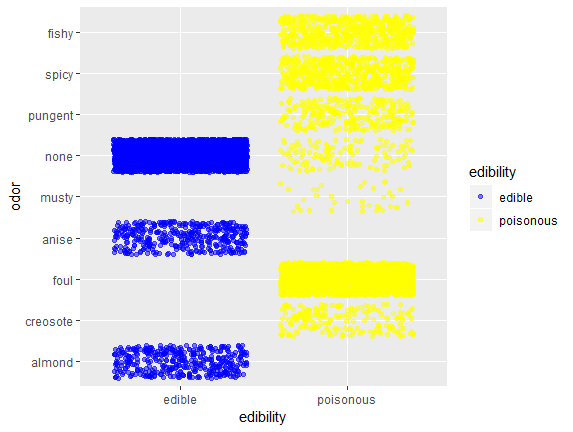

Using odor as the predictor, it can be seen that this is an informative variable as it has only an overlap of data point in the "none" odor area while the rest did not show any overlap. The plot proves that this is a very strong predictor and will be very important in building an accurate model. 

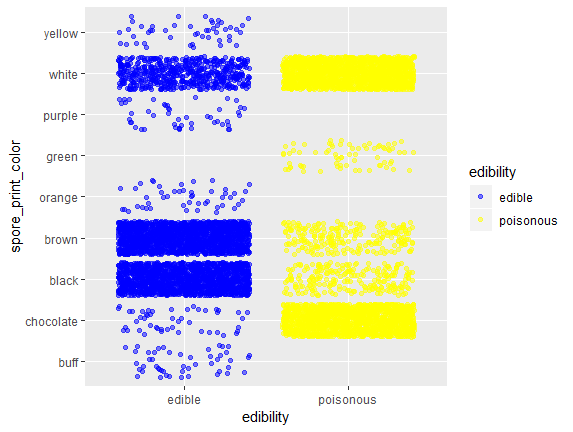

On the other hand, spore_print_color can only be reliantly used to distinguish the edibility of a mushroom when it's yelow, purple, orange or buff. However, as we can see in the data distribution, there is still a difference in density and range between edible and poisonous mushrooms in the remaining categories. 

In [ ]:
ggplot(data, aes(x = gill_color, y = cap_color, col = edibility)) + 
  geom_jitter(alpha = 0.5) + 
  scale_color_manual(breaks = c("edible", "poisonous"), 
                     values = c("blue", "yellow"))

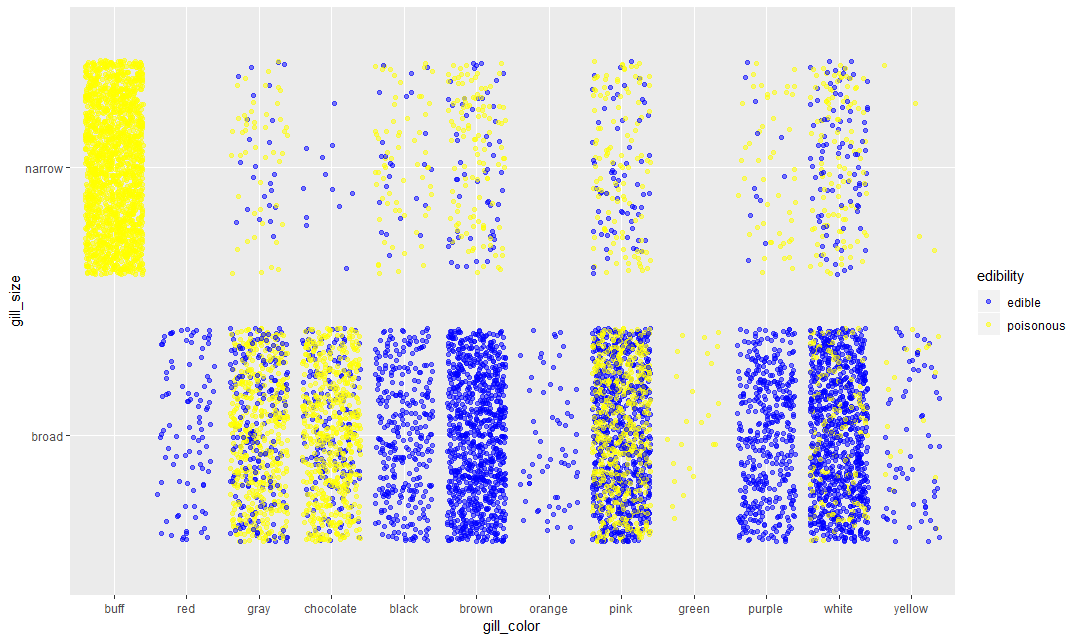

It's clear that poisonous mushroom concentrated heavily on the buff, grey, chocolate and pink colors. If mushrooms with these colors are encountered in the wild, it's best to leave them alone. On the other hand, narrow or broad gill_size do not create much distinction between edible or poisonous. 

Model building

In [ ]:
library(caret)
set.seed(1124)
partition = createDataPartition(data[,"edibility"], times = 1, p = 0.66, list = F)
training = data[partition,]
test = data[-partition,]

The data is split between 2/3 for the training data, and 1/3 for the test data. 

In [ ]:
model_rf = randomForest(edibility ~., ntree =100, data = training)
print(model_rf)

In [ ]:
plot(model_rf)

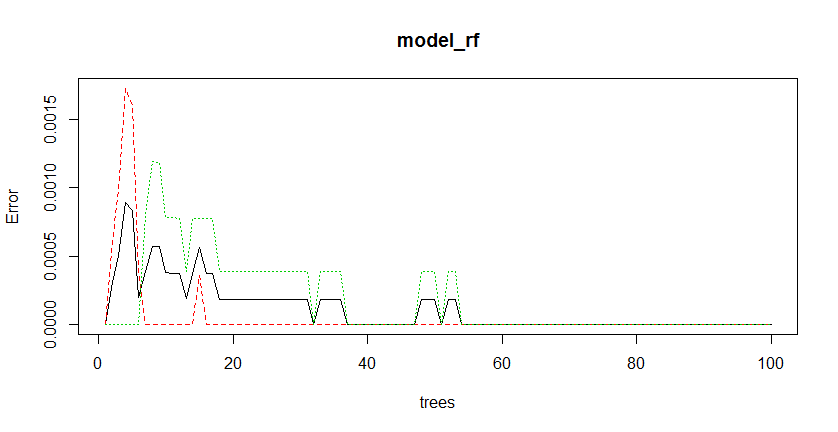

In [ ]:
confusionMatrix(data = model_rf$predicted, reference = training$edibility, positive = "edible")

The confusion matrix can be generated using the above code. The result demonstrate a perfect fit for the training data as it showed 100% accuracy. However, this may be a result of of overfitting our model to the training dataset. 

In order to know how our model perform on the test dataset. The following codes are inputted.

In [ ]:
test_rf = predict(model_rf, newdata = test)
table(test_rf, test$edibility)

100% prediction even on the test dataset. As such, we can conclude that we can rely on this model to distinguish between poisonous and edible mushroom.